In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.074716,-0.001580,0.012425,0.033861
std,1.013524,1.008688,1.038768,0.977995
min,-3.291485,-2.805676,-3.665442,-2.526020
25%,-0.577101,-0.714929,-0.681784,-0.646991
50%,0.086378,-0.031038,0.035280,0.025909
75%,0.753617,0.657485,0.658508,0.719730
max,3.339652,3.139379,3.326214,3.343438


In [4]:
data[(data.abs() > 3).any(axis="columns")]

,0,1,2,3
6,3.013090,0.902755,0.132577,0.790242
23,-0.370762,0.382631,3.326214,-0.262595
38,-3.291485,-0.233153,-1.663056,0.386737
44,1.113657,-1.649727,0.141296,3.084480
67,0.182586,0.815575,-3.665442,0.892605
146,0.091631,0.989211,3.061935,1.209620
224,0.268225,-1.644692,-3.343898,-2.304428
355,0.184609,0.726062,2.107916,3.267119
509,0.598275,0.615490,-3.065530,1.089427
580,-0.100582,-0.883376,-3.211822,1.225074


In [5]:
data[data.abs() > 3] = np.sign(data) * 3

In [6]:
arr = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])
print(arr.shape)
print(arr[1, 2])
print(arr[:, 1])
print(arr[2:, :3].shape)

(3, 4)
6
[1 5 9]
(1, 3)


In [7]:
arr = np.array([-2, 2, -1, 1, 0])
arr > 0  # yields array([False,True,False,True,False])

array([False,  True, False,  True, False])

In [8]:
srs = pd.Series(arr)
srs > 0  # yields a series of True/False values

0    False
1     True
2    False
3     True
4    False
dtype: bool

In [9]:
arr = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
print(arr > 2)
print(arr[arr > 2])

[[False False False  True]
 [ True  True  True  True]]
[3 4 5 6 7]


In [10]:
arr_letters = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g'])
arr_numbers = np.array([6, 5, 4, 3, 2, 1, 0])
print(arr_letters[[0, 2, 4]])
print(arr_numbers[[0, 2, 4]])
print(arr_letters[arr_numbers[[0, 2, 4]]])

['a' 'c' 'e']
[6 4 2]
['g' 'e' 'c']


In [21]:
df = pd.DataFrame({"key1": ["a", "a", None, "b", "b", "a", None], "key2": pd.Series(
    [1, 2, 1, 2, 1, None, 1], dtype="Int64"), "data1": np.random.standard_normal(7), "data2": np.random.standard_normal(7)})
df

,key1,key2,data1,data2
0,a,1,-0.341476,1.474921
1,a,2,-0.193169,-0.583646
2,None,1,-0.208840,0.890311
3,b,2,-0.214680,0.556991
4,b,1,-0.177680,0.616112
5,a,<NA>,-0.246645,0.086442
6,None,1,-0.266095,1.086656


In [29]:
grouped = df["data1"].groupby(df["key1"])
grouped.apply(print)

0   -0.341476
1   -0.193169
5   -0.246645
Name: a, dtype: float64
3   -0.21468
4   -0.17768
Name: b, dtype: float64


key1
a    None
b    None
Name: data1, dtype: object

In [15]:
grouped.mean()

key1
a   -0.175611
b   -0.221970
Name: data1, dtype: float64

In [17]:
means = df["data1"].groupby([df["key1"], df["key2"]]).mean()
means

key1  key2
a     1      -0.387886
      2      -0.055940
b     1       0.302037
      2      -0.745977
Name: data1, dtype: float64

In [18]:
means.unstack()

key2,1,2
key1,,
a,-0.387886,-0.055940
b,0.302037,-0.745977


In [20]:
for name, stats in df.groupby("key1"):
    print(name)
    print(stats)

a
  key1  key2     data1     data2
0    a     1 -0.387886 -1.195332
1    a     2 -0.055940 -0.147882
5    a  <NA> -0.083007  1.739606
b
  key1  key2     data1     data2
3    b     2 -0.745977  0.246051
4    b     1  0.302037  0.059590


In [35]:
pokemon = pd.read_excel('pokemon.xlsx')

In [36]:
pokemon

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
1,001,Bulbasaur,POISON,318,45,49,49,65,65,45
2,002,Ivysaur,GRASS,405,60,62,63,80,80,60
3,002,Ivysaur,POISON,405,60,62,63,80,80,60
4,003,Venusaur,GRASS,525,80,82,83,100,100,80
...,...,...,...,...,...,...,...,...,...,...
1163,716,Xerneas,FAIRY,680,126,131,95,131,98,99
1164,717,Yveltal,DARK,680,126,131,95,131,98,99
1165,717,Yveltal,FLYING,680,126,131,95,131,98,99
1166,718,Zygarde,DRAGON,600,108,100,121,81,95,95


In [37]:
pokemon.describe()

,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,435.632705,69.525685,78.815925,74.369863,72.619007,71.715753,68.586473
std,116.527166,24.919600,31.714658,30.761824,31.770755,27.265611,28.315690
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,334.000000,50.000000,55.000000,50.000000,50.000000,50.000000,47.000000
50%,453.000000,66.000000,75.000000,70.000000,65.000000,70.000000,65.500000
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [47]:
pokemon_types = pokemon.groupby('Type')
print(pokemon_types)

In [68]:
pokemon_types.count()

,#,Name,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
Type,,,,,,,,,
BUG,71,71,71,71,71,71,71,71,71
DARK,49,49,49,49,49,49,49,49,49
DRAGON,44,44,44,44,44,44,44,44,44
ELECTRIC,51,51,51,51,51,51,51,51,51
FAIRY,34,34,34,34,34,34,34,34,34
FIGHTING,51,51,51,51,51,51,51,51,51
FIRE,62,62,62,62,62,62,62,62,62
FLYING,100,100,100,100,100,100,100,100,100
GHOST,45,45,45,45,45,45,45,45,45


In [70]:
pokemon_types.count()['#']

Type
BUG          71
DARK         49
DRAGON       44
ELECTRIC     51
FAIRY        34
FIGHTING     51
FIRE         62
FLYING      100
GHOST        45
GRASS        93
GROUND       62
ICE          37
NORMAL      100
POISON       61
PSYCHIC      83
ROCK         56
STEEL        47
WATER       122
Name: #, dtype: int64

In [73]:
pokemon_types.count()['#']

Type
BUG          71
DARK         49
DRAGON       44
ELECTRIC     51
FAIRY        34
FIGHTING     51
FIRE         62
FLYING      100
GHOST        45
GRASS        93
GROUND       62
ICE          37
NORMAL      100
POISON       61
PSYCHIC      83
ROCK         56
STEEL        47
WATER       122
Name: #, dtype: int64

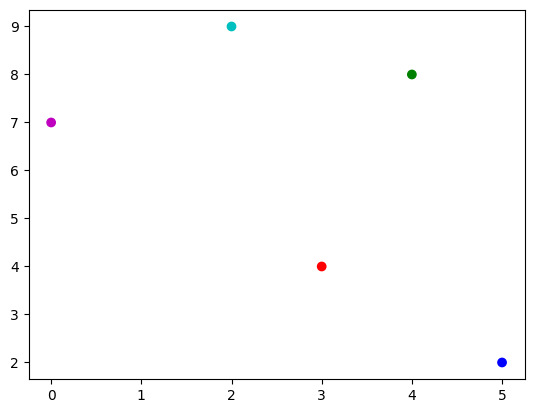

In [74]:
df = pd.DataFrame({
    'a': [3, 4, 5, 2, 0],
    'b': [4, 8, 2, 9, 7],
    'c': ['r', 'g', 'b', 'c', 'm']
})
plt.scatter(df['a'], df['b'], color=df['c'])

C:\Users\ezmos\AppData\Local\Temp\ipykernel_16444\1560313255.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot()


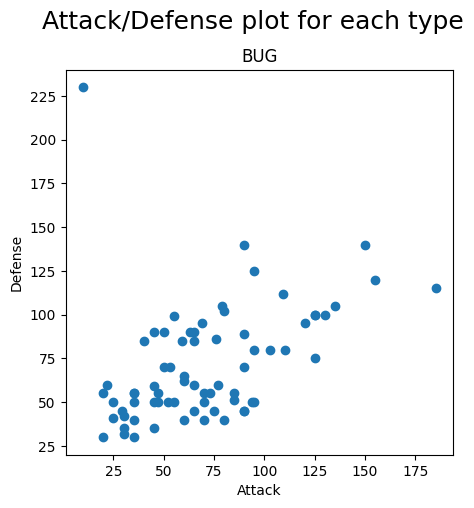

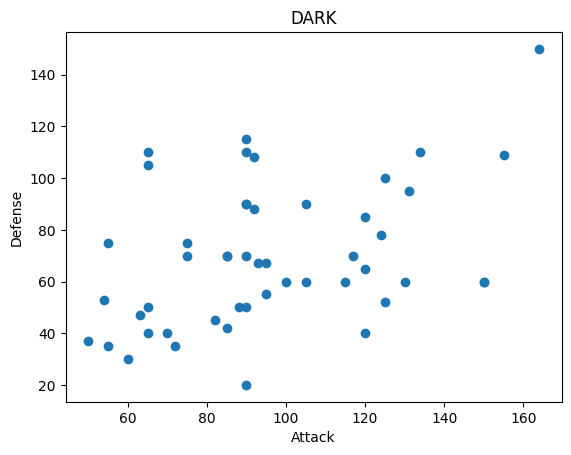

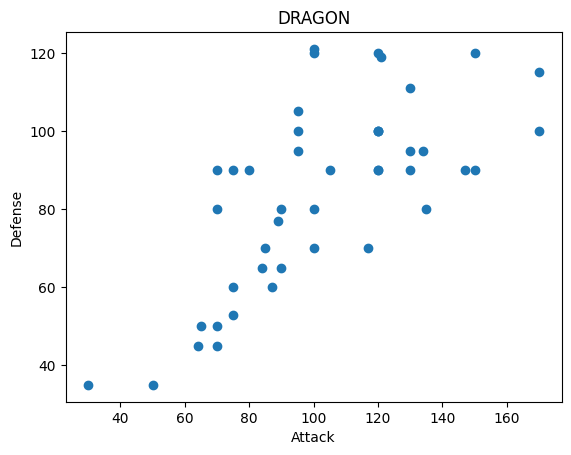

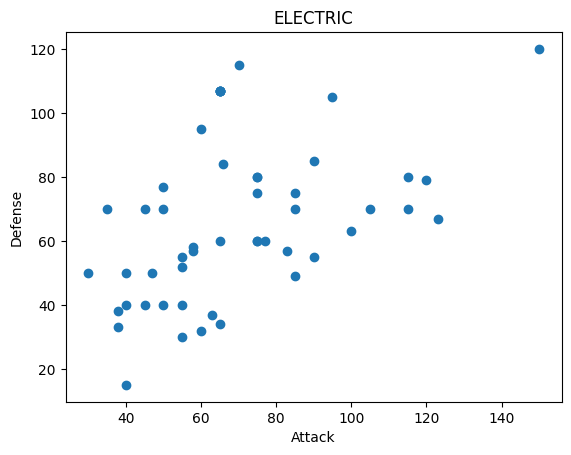

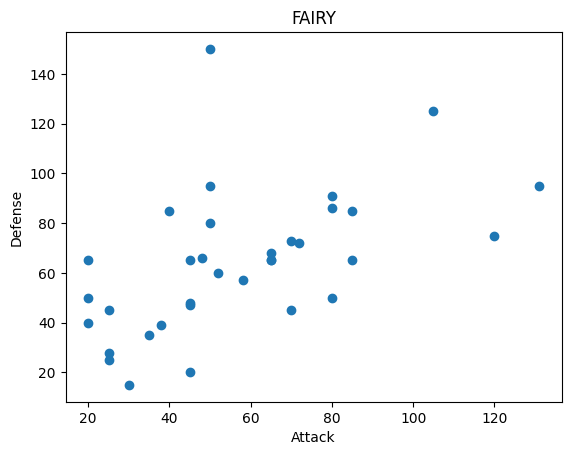

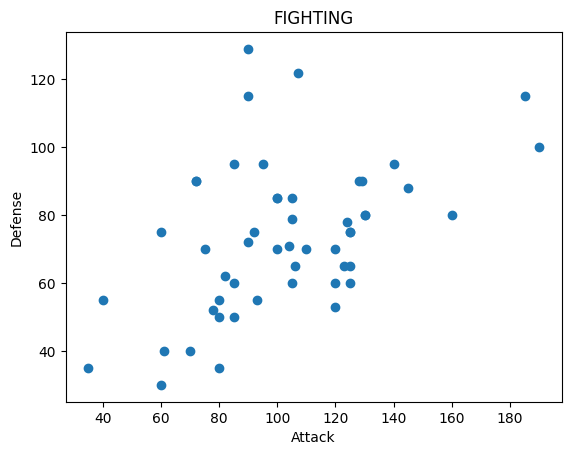

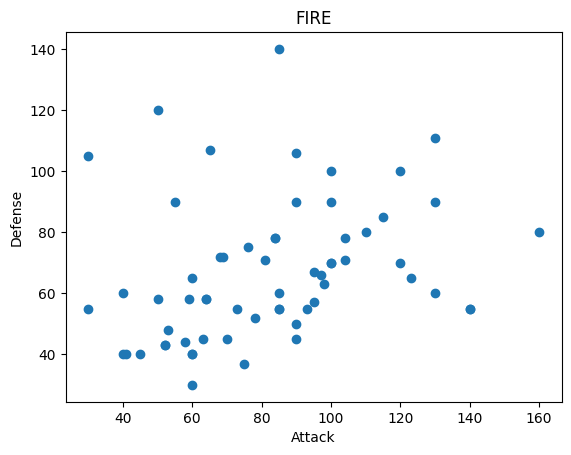

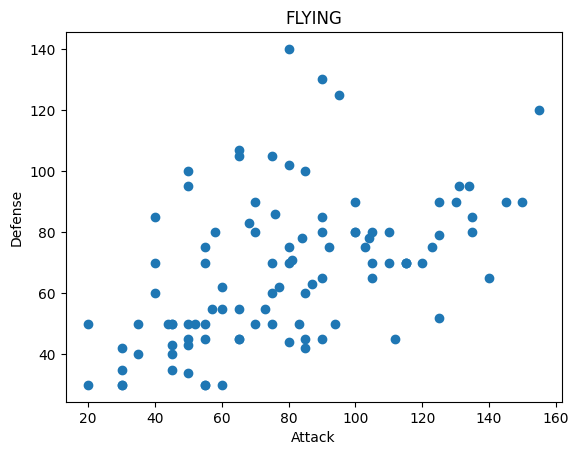

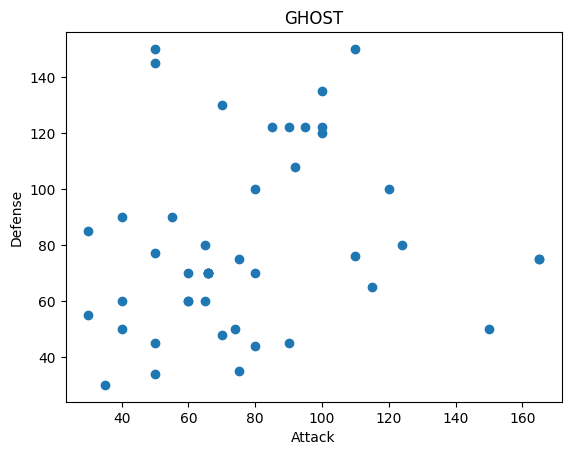

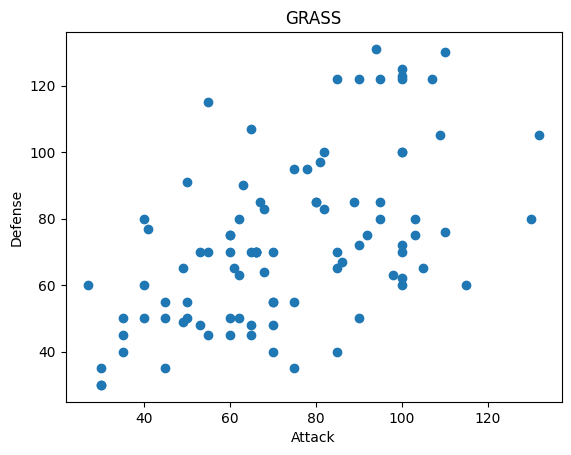

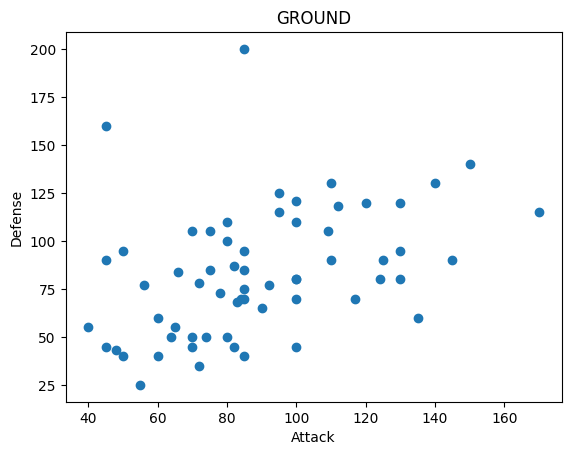

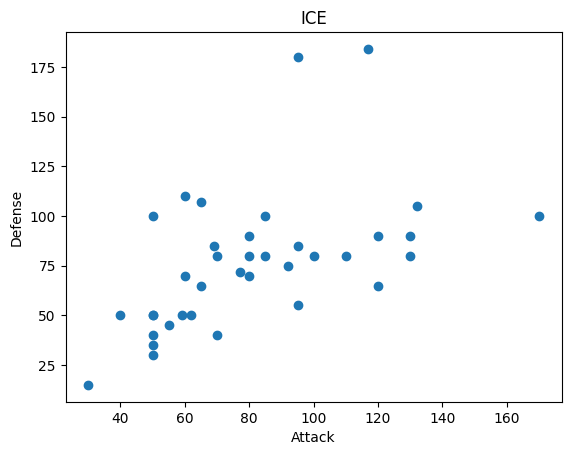

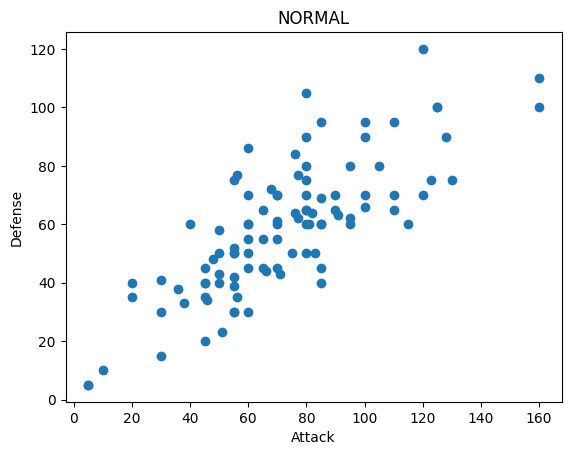

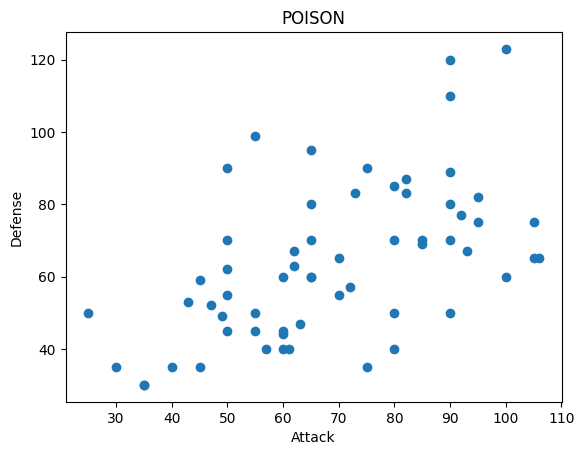

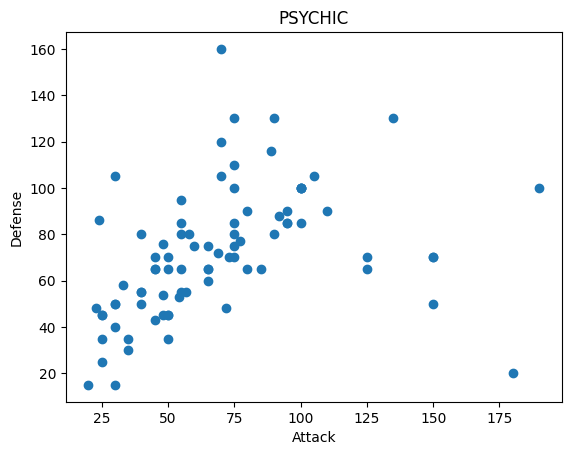

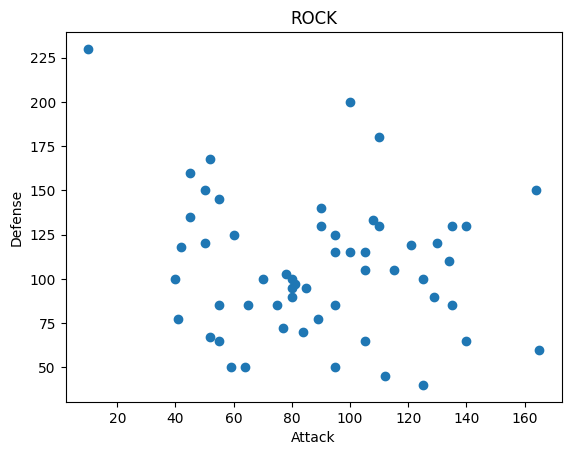

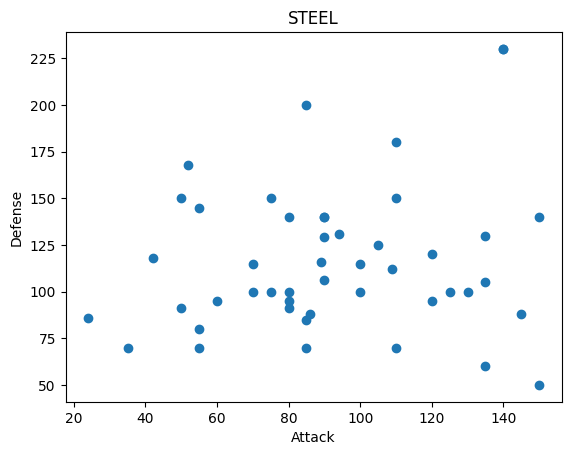

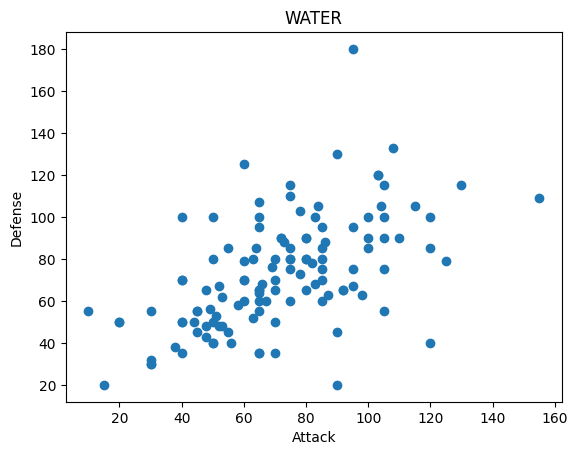

In [117]:
pokemon_types = pokemon.groupby('Type')
fig, axs = plt.subplots(len(pokemon_types), 1, figsize=(5, 5))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("Attack/Defense plot for each type", fontsize=18, y=1)
for pktype, stats in pokemon_types:
    ax = plt.subplot()
    plt.scatter(stats['Attack'], stats['Defense'])
    ax.set_title(pktype)
    ax.set_xlabel("Attack")
    ax.set_ylabel("Defense")
    plt.show()